# Salient Object Detection Demo

This notebook demonstrates the trained model's ability to detect salient objects in images.

In [8]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import time
import sys
sys.path.append('src')
from sod_model import SODModel

In [9]:
def load_model(model_path='best_model.pth'):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = SODModel()
    model.load_state_dict(torch.load(model_path, map_location=device))
    model = model.to(device)
    model.eval()
    return model, device

In [10]:
def preprocess_image(image_path, target_size=128):
    img = Image.open(image_path).convert('RGB')
    img = img.resize((target_size, target_size))
    img_array = np.array(img) / 255.0
    img_tensor = torch.FloatTensor(img_array).permute(2, 0, 1).unsqueeze(0)
    return img_tensor, img_array

In [11]:
def predict_saliency(model, img_tensor, device):
    img_tensor = img_tensor.to(device)
    
    start_time = time.time()
    with torch.no_grad():
        output = model(img_tensor)
    inference_time = time.time() - start_time
    
    mask = output.cpu().squeeze().numpy()
    return mask, inference_time

In [12]:
def visualize_results(original_img, saliency_mask, inference_time):
    binary_mask = (saliency_mask > 0.5).astype(np.float32)
    
    overlay = original_img.copy()
    overlay[:, :, 0] = np.where(binary_mask > 0.5, 1.0, overlay[:, :, 0])
    
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    axes[0].imshow(original_img)
    axes[0].set_title('Input Image')
    axes[0].axis('off')
    
    axes[1].imshow(binary_mask, cmap='gray')
    axes[1].set_title('Saliency Mask')
    axes[1].axis('off')
    
    axes[2].imshow(overlay)
    axes[2].set_title('Overlay')
    axes[2].axis('off')
    
    plt.tight_layout()
    plt.show()
    
    print(f"\nInference Time: {inference_time*1000:.2f} ms")

In [13]:
model, device = load_model()
print(f"Model loaded on {device}")

Model loaded on cpu


## Run Demo

Change the `image_path` below to test on different images:

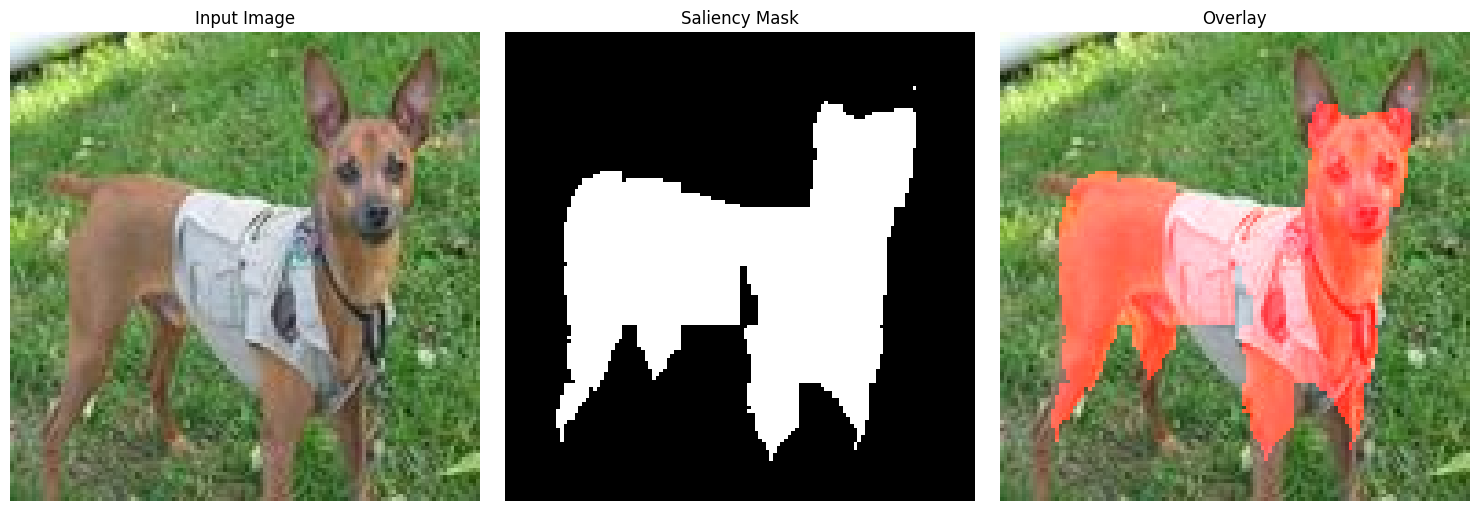


Inference Time: 153.53 ms


In [31]:
image_path = 'data/ECSSD/resized_images_128/0070.jpg'

img_tensor, original_img = preprocess_image(image_path)
saliency_mask, inference_time = predict_saliency(model, img_tensor, device)
visualize_results(original_img, saliency_mask, inference_time)